SKLearn Models


# Introduction


This is the visual image of what our Neural Network is going to look like

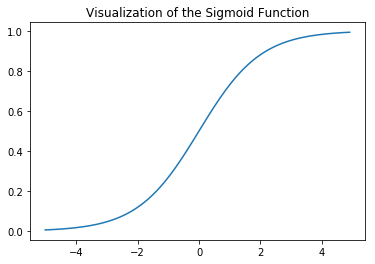

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# def sigmoid(z):
#     return 1/(1+np.exp(-z))

plt.plot(np.arange(-5,5,0.1), sigmoid(np.arange(-5,5,0.1)))
plt.title('Visualization of the Sigmoid Function')

plt.show()
# https://www.geeksforgeeks.org/ml-logistic-regression-using-tensorflow/

# Input the Data and Display Data

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# https://archive.ics.uci.edu/ml/datasets/Website+Phishing# arff-> csv converter
dataset = pd.read_csv("Training_Dataset_NoID.csv")
print('The dataset has {0} datapoints with {1} features'.format(
		dataset.shape[0], dataset.shape[1]-1))

print(dataset.head())

a = len(dataset[dataset.Result==0])
b = len(dataset[dataset.Result==-1])
c = len(dataset[dataset.Result==1])

print(a,"Suspicious URLs")
print(b,"Phishing URLs")
print(c,"Legitamite URLs")

In [0]:
sns.countplot(dataset['Result'])


In [0]:
sns.heatmap(dataset.corr(), annot=True)


In [0]:
sns.pairplot(dataset)


In [0]:
dataset.describe()

Drop columns that have the least importance or features that I was unable to extract

In [0]:

dataset = dataset.drop(columns=['Domain_registeration_length', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick','popUpWidnow', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report'])
# Not too sure why there is an error here but still works 

x = dataset.drop(['Result'], axis=1).values
y = dataset['Result'].values  # print(y.shape)
	

	# Need to grab the features for the weights output.

dataset = dataset.drop(columns = ['Result'])

Train X and Y

30 % Test size and 70% Train size



In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)  # print(x_train.shape)

print(x_train.shape)
print(y_train.shape)

Grid Search CV to find the best paramters for the RF
More paramaters can be put in but runtime would take longer

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 700],'max_features': ['sqrt', 'log2'],'criterion' :['gini', 'entropy']}]

grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train)
#printing best parameters 
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_))  

Bring in Random Forest

In [21]:
import time
from sklearn.metrics import accuracy_score
start = time.time()
RFC = RandomForestClassifier(n_estimators=700, criterion='gini', max_features='sqrt', random_state=0)
RFC = RFC.fit(x_train, np.ravel(y_train, order='C')) #Was getting a warning with just( RFC.fit(x_train,y_train)) and this is how to clear it up.
feature_importances = pd.DataFrame(RFC.feature_importances_, index=dataset.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)
prediction = RFC.predict(x_test)
accuracy = 100.0 * accuracy_score(y_test, prediction)
print('Accuracy of Random Forest: ', accuracy)
end = time.time()
Log = str(end-start)
print("Running time: ", Log)


                          importance
SSLfinal_State              0.395925
URL_of_Anchor               0.311015
having_Sub_Domain           0.065243
Links_in_tags               0.051577
Prefix_Suffix               0.049091
Request_URL                 0.025546
SFH                         0.022764
having_IP_Address           0.014109
URL_Length                  0.011979
having_At_Symbol            0.008626
HTTPS_token                 0.008372
Favicon                     0.007613
Shortining_Service          0.007138
Submitting_to_email         0.006483
double_slash_redirecting    0.006141
Iframe                      0.004785
port                        0.003594
Accuracy of Random Forest:  95.41754597527886
Running time:  0.5472254753112793


Display True Positives, True Negatives, False Positives, and False Negatives

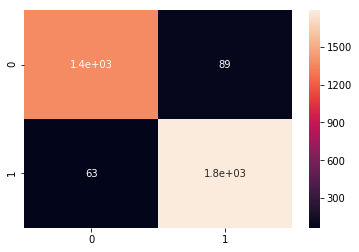

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True)